# 닮은꼴 연예인 찾기. 데이터는 개인이 수집

[(171, 409, 439, 141)]


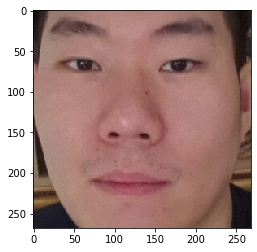

In [1]:
import face_recognition
import os
import numpy as np
from PIL import Image

image_path = os.getenv('HOME')+'/aiffel/face_embedding/남자얼굴2/정규환.png'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려보자

In [2]:
def get_cropped_face(image_file):
  
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a,b,c,d = face_locations[0]
    cropped_face = image[a:c, d:b,:]
  
    
    return cropped_face

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/남자얼굴2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['이병헌.jpg', '제이크 질렌할.jpeg', '장원준.jpeg', '한기범.jpg', '저스틴 존슨.jpeg', '크리스 에반스.jpg', '이승기.jpeg', '스칼렛요한슨.jpg', '레오나르도 디카프리오.jpeg', '유아인.jpg', '박재범.jpg', '이명박.jpg', '브록레스너.jpg', '신동엽.jpg', '한석규.jpg', '로꼬.jpg', '켄 정.jpeg', '코너맥그리거.jpg', '김동현.jpg', '마동석.jpeg', '벤 에플렉.jpeg', '잭 니콜슨.jpeg', '조승우.jpeg', '로다주.jpeg', '김민재.jpeg', '차승원.jpg', '박희순.jpg', '이종혁.jpg', '최민식.jpg', '배성우.png', '이천수.jpg', '앤드류 응.png', '용감한형제.jpg', '사무엘잭슨.jpg', '문재인.jpeg', '강호동.jpg', '스윙스.jpeg', '박완규.png', '숀 코네리.jpg', '하정우.jpg', '잭 블랙.jpeg', '한고은.jpg', 'biden.jpg', '성룡.jpg', '최무성.jpg', '존 파브르.jpeg', '노무현.jpeg', '차두리.jpeg', '박명수.jpg', '크리스 햄스워스.jpg', '박정민.jpg', '이재용.jpg', '훈이.JPG', '고창석.jpeg', '정규환.png', '김래원.jpeg', '김상호.png', '유노윤호.jpg', '김영삼.jpeg', '이연걸.jpeg', '브래들리 쿠퍼.jpg', '백윤식.png', '이희준.jpg', '서장훈.jpg', 'trump.jpg', '윤균상.jpg', '유지태.jpg', '이승철.jpeg', '황정민.jpg', 'clinton.jpeg', '이범수.jpeg', '더락.jpg', '류승룡.jpeg', '이정재.jpeg', '지드래곤.jpeg', '류준열.jpg', '지민(BTS).jpg', '하빕.jpg', '주진모.jpg', 'bush.jpeg']


In [4]:
#얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['정규환']

array([-0.04348872,  0.16057649, -0.01226999, -0.08784984, -0.04455559,
       -0.07798804, -0.07504504, -0.14892478,  0.10320205, -0.09953891,
        0.25166348, -0.0711447 , -0.1761533 , -0.11862119, -0.05675181,
        0.16417119, -0.21142638, -0.09860784, -0.0388418 ,  0.04357522,
        0.16608216,  0.02022883,  0.01867367,  0.07258154, -0.06110464,
       -0.29147622, -0.08927061, -0.0507344 ,  0.04631434, -0.05484774,
       -0.02395551, -0.00470927, -0.213934  , -0.03745041,  0.02771668,
        0.03976428, -0.02984277, -0.1299839 ,  0.22574487, -0.00724128,
       -0.23380701,  0.08245016, -0.00202085,  0.23379821,  0.18768199,
       -0.05083167,  0.03667005, -0.18711148,  0.14928986, -0.14415582,
        0.02760853,  0.18346351,  0.09240209,  0.05529696, -0.03350251,
       -0.1236363 ,  0.01587382,  0.08239637, -0.13218766,  0.00245029,
        0.1017866 , -0.06140462, -0.03688952, -0.1402425 ,  0.20212725,
        0.05546211, -0.17744596, -0.21132688,  0.0956396 , -0.11

In [7]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('사무엘잭슨', '정규환')

0.9587477201856426

In [8]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록함
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('사무엘잭슨')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산

# 임베딩 벡터 정렬
이미 모든 이미지 파일에 대한 얼굴 임베딩 딕셔너리를 가지고 있음.
이제 이 딕셔너리를 오름차순 정렬하되, 정렬 기준을 바로 trump와의 임베딩 벡터 거리 함수로. 이때 lambda 함수가 정렬 key로 활용.

In [9]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('사무엘잭슨',
  array([-1.34211376e-01,  9.22305733e-02,  1.07576393e-01,  2.09855987e-03,
          3.71938236e-02, -2.12435037e-01,  2.27735415e-02, -7.89560899e-02,
          8.53384733e-02, -4.20849212e-02,  2.39851445e-01,  3.03167477e-02,
         -1.50652677e-01, -1.88596711e-01,  1.45949289e-01,  4.91330400e-02,
         -1.22062042e-01, -9.40526202e-02, -5.81105463e-02, -1.06023088e-01,
          1.73339471e-02,  4.67328727e-02,  8.00327882e-02,  5.28564863e-02,
         -5.81994727e-02, -3.04885924e-01, -1.09742284e-01, -1.58749104e-01,
          8.32635686e-02, -6.75725043e-02, -6.80078715e-02,  5.10793366e-02,
         -1.55456677e-01, -4.30462435e-02, -2.70868242e-02,  7.87822455e-02,
          4.83805612e-02, -2.44182087e-02,  1.39380023e-01,  3.61692980e-02,
         -9.06120688e-02, -1.08771257e-01, -4.38982695e-02,  3.00925434e-01,
          2.33421490e-01, -7.20781907e-02,  3.54418643e-02,  6.21448010e-02,
          5.55830523e-02, -1.74460620e-01,  4.59628031e-02,  6.72

In [10]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [11]:
# 나와 가장 닮은 사람은 누굴까
get_nearest_face('정규환')

순위 1 : 이름(류준열), 거리(0.4528240109768387)
순위 2 : 이름(박재범), 거리(0.4608097362853948)
순위 3 : 이름(로꼬), 거리(0.4609512580471032)
순위 4 : 이름(박완규), 거리(0.46799399185460416)


face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save('HOME')+'/aiffel/face_embedding/'

In [1]:
from tkinter import *
from PIL import ImageTk, Image
from tkinter import filedialog
import os

root = Tk()
root.geometry("550x300+300+150")
root.resizable(width=True, height=True)

def openfn():
    filename = filedialog.askopenfilename(title='open')
    return filename
def open_img():
    x = openfn()
    img = Image.open(x)
    img = img.resize((250, 250), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    panel = Label(root, image=img)
    panel.image = img
    panel.pack()

btn = Button(root, text='open image', command=open_img).pack()

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/aiffel/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 2813, in open
    fp.seek(0)
AttributeError: 'tuple' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/aiffel/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-1-d35fc5fb4b06>", line 15, in open_img
    img = Image.open(x)
  File "/home/aiffel/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 2815, in open
    fp = io.BytesIO(fp.read())
AttributeError: 'tuple' object has no attribute 'read'


다른 GUI 시도. 연예인 사진들과 내 사진을 따로 구분하여 저장, def 들도 변경해야줘야하는데 실패

import tkinter.ttk as ttk

from tkinter import filedialog
import tkinter as tk
import PIL.Image
from tkinter.filedialog import askopenfilename
import py_compile
import face_recognition


window = Tk()
window.title("닮은꼴 연예인 찾기")

window.geometry("1024x600")

label1 = Label(window, text="사진을 입력하세요") 
label2 = Label(window, text="닮은꼴 연예인 리스트입니다.")
label1.grid(row=0, column=0, padx=30, pady=10)
label2.grid(row=0, column=2, padx=30, pady=10)



text1 = Text(window, width=70, height=50)
text1.grid(row=2, column=2, padx=20, pady=10)


canvas = tk.Canvas(window, width=600, height=650)
canvas.grid(row=2, column=0,padx=20, pady=10)
    
action_find = ttk.Button(window, text="찾기", command= click_find)
action_load_image = ttk.Button(window, text = 'Load Image', command = click_open_img)
action_find.grid(row=2, column=1)
action_load_image.grid(row=1, column = 0)

window.mainloop()